In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
disease_symptom_df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

print(disease_symptom_df.head)
disease_symptom_df.info()

<bound method NDFrame.head of                       diseases  anxiety and nervousness  depression  \
0               panic disorder                        1           0   
1               panic disorder                        0           0   
2               panic disorder                        1           1   
3               panic disorder                        1           0   
4               panic disorder                        1           1   
...                        ...                      ...         ...   
246940  open wound of the nose                        0           0   
246941  open wound of the nose                        0           0   
246942  open wound of the nose                        0           0   
246943  open wound of the nose                        0           0   
246944  open wound of the nose                        0           0   

        shortness of breath  depressive or psychotic symptoms  \
0                         1                         

In [3]:
# Basic info
print("Dataset shape:", disease_symptom_df.shape)
print("\nColumn types:")
print(disease_symptom_df.dtypes.value_counts())
print("\nMissing values:")
print(disease_symptom_df.isnull().sum().sort_values(ascending=False).head())

Dataset shape: (246945, 378)

Column types:
int64     377
object      1
Name: count, dtype: int64

Missing values:
diseases                      0
stiffness all over            0
infertility                   0
painful menstruation          0
unpredictable menstruation    0
dtype: int64


In [4]:
# Number of unique diseases
print("\nNumber of unique diseases:", disease_symptom_df['diseases'].nunique())
print("Most common diseases:")
print(disease_symptom_df['diseases'].value_counts().head(10))


Number of unique diseases: 773
Most common diseases:
diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
hypoglycemia                      1215
peripheral nerve disorder         1215
esophagitis                       1215
vaginal cyst                      1215
conjunctivitis due to allergy     1215
Name: count, dtype: int64


In [7]:
# Average number of symptoms per patient
disease_symptom_df['symptom_count'] = disease_symptom_df[symptom_cols].sum(axis=1)
print("\nAvg symptoms per patient:", disease_symptom_df['symptom_count'].mean())


Avg symptoms per patient: 5.3328514446536674



Top 10 most common symptoms:
sharp abdominal pain    32307
vomiting                27874
headache                24719
cough                   24296
sharp chest pain        24016
nausea                  23687
back pain               21809
shortness of breath     21346
fever                   20394
dizziness               17272
dtype: int64


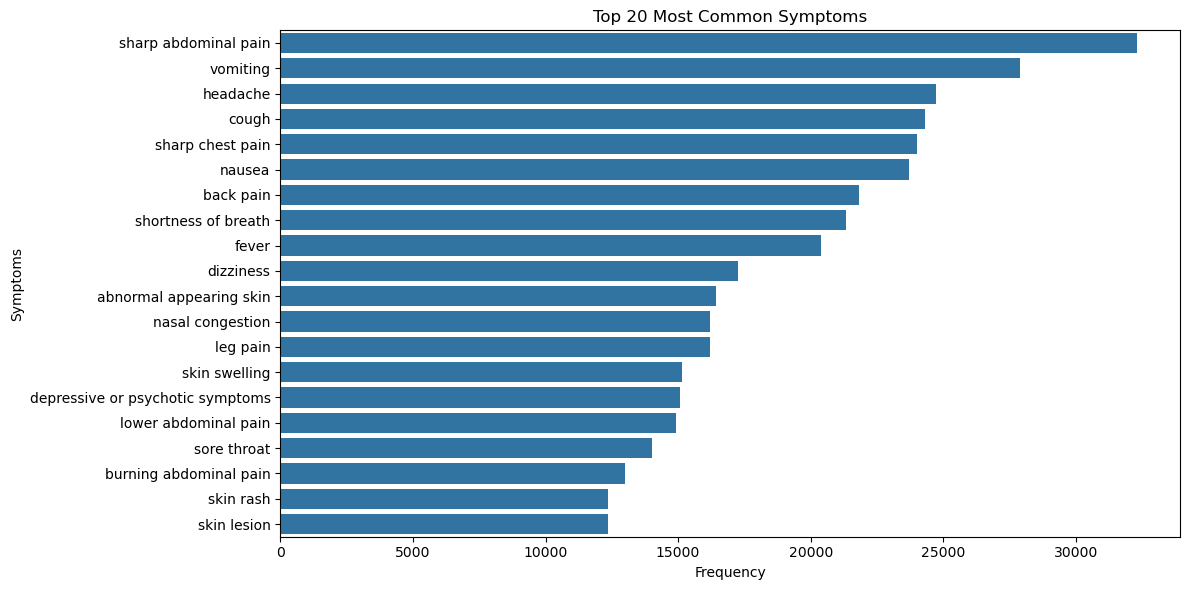

In [5]:
# Symptom frequency
symptom_cols = disease_symptom_df.columns.drop('diseases')
symptom_freq = disease_symptom_df[symptom_cols].sum().sort_values(ascending=False)

# Top symptoms
print("\nTop 10 most common symptoms:")
print(symptom_freq.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_freq.head(20).values, y=symptom_freq.head(20).index)
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")
plt.tight_layout()
plt.show()

In [9]:
# Top Symptoms Per Disease
print("\nTop 5 symptoms for most common diseases:")
top_diseases = disease_symptom_df['diseases'].value_counts().head(5).index
for disease in top_diseases:
    subset = disease_symptom_df[disease_symptom_df['diseases'] == disease]
    top_symptoms = subset[symptom_cols].sum().sort_values(ascending=False).head(5)
    print(f"\n{disease}:\n{top_symptoms}")


Top 5 symptoms for most common diseases:

cystitis:
involuntary urination    639
side pain                630
symptoms of bladder      628
frequent urination       624
suprapubic pain          614
dtype: int64

vulvodynia:
back pain               632
vaginal discharge       627
lower abdominal pain    616
nausea                  613
pelvic pain             611
dtype: int64

nose disorder:
ear pain                632
nosebleed               628
facial pain             624
difficulty breathing    619
painful sinuses         617
dtype: int64

complex regional pain syndrome:
back pain           649
foot or toe pain    633
neck pain           632
leg pain            616
arm pain            616
dtype: int64

spondylosis:
neck pain            629
low back pain        628
ache all over        627
back pain            621
loss of sensation    616
dtype: int64


In [13]:
# Diseases Most Associated With a Specific Symptom
target_symptom = 'abnormal appearing skin'
if target_symptom in symptom_cols:
    disease_by_symptom = disease_symptom_df[disease_symptom_df[target_symptom] == 1]['diseases'].value_counts().head(5)
    print(f"\nTop diseases where '{target_symptom}' appears:\n{disease_by_symptom}")
else:
    print(f"\nSymptom '{target_symptom}' not found in the dataset.")


Top diseases where 'abnormal appearing skin' appears:
diseases
eczema                          600
fungal infection of the hair    600
pyogenic skin infection         484
seborrheic keratosis            470
skin disorder                   468
Name: count, dtype: int64


In [18]:
# Top Diseases Per Symptom
def top_diseases_for_each_symptom(df, symptom_columns, top_n=3):
    result = {}
    for symptom in symptom_columns:
        top_diseases = (
            df[df[symptom] == 1]
            .groupby("diseases")
            .size()
            .sort_values(ascending=False)
            .head(top_n)
        )
        result[symptom] = top_diseases
    return result

top_disease_per_symptom = top_diseases_for_each_symptom(disease_symptom_df, symptom_cols)

for symptom in list(top_disease_per_symptom.keys())[-100:]:
    print(f"\nTop diseases for symptom: {symptom}")
    print(top_disease_per_symptom[symptom])


Top diseases for symptom: bumps on penis
diseases
viral warts                         212
male genitalia infection             91
atrophy of the corpus cavernosum     39
dtype: int64

Top diseases for symptom: too little hair
diseases
seborrheic dermatitis           442
fungal infection of the skin    350
onychomycosis                   264
dtype: int64

Top diseases for symptom: foot or toe lump or mass
diseases
bunion                    20
open wound of the foot    16
dtype: int64

Top diseases for symptom: skin rash
diseases
strep throat                    624
fungal infection of the hair    619
eczema                          614
dtype: int64

Top diseases for symptom: mass or swelling around the anus
diseases
hemorrhoids          453
colorectal cancer      7
dtype: int64

Top diseases for symptom: low back swelling
Series([], dtype: int64)

Top diseases for symptom: ankle swelling
diseases
injury to the leg      615
gout                   612
fracture of the leg    353
dtype: int

In [19]:
# Symptoms Most Associated With a Specific Disease
def most_common_symptoms_for_disease(df, disease_name, symptom_columns, top_n=10):
    subset = df[df['diseases'] == disease_name]
    symptom_freq = subset[symptom_columns].sum().sort_values(ascending=False)
    return symptom_freq.head(top_n)

target_disease = 'eczema'
top_symptoms = most_common_symptoms_for_disease(disease_symptom_df, target_disease, symptom_cols)

print(f"\nMost associated symptoms for '{target_disease}':")
print(top_symptoms)


Most associated symptoms for 'eczema':
itching of skin              633
skin lesion                  619
acne or pimples              617
skin swelling                615
skin rash                    614
warts                        612
irregular appearing scalp    609
skin irritation              603
allergic reaction            601
abnormal appearing skin      600
dtype: int64


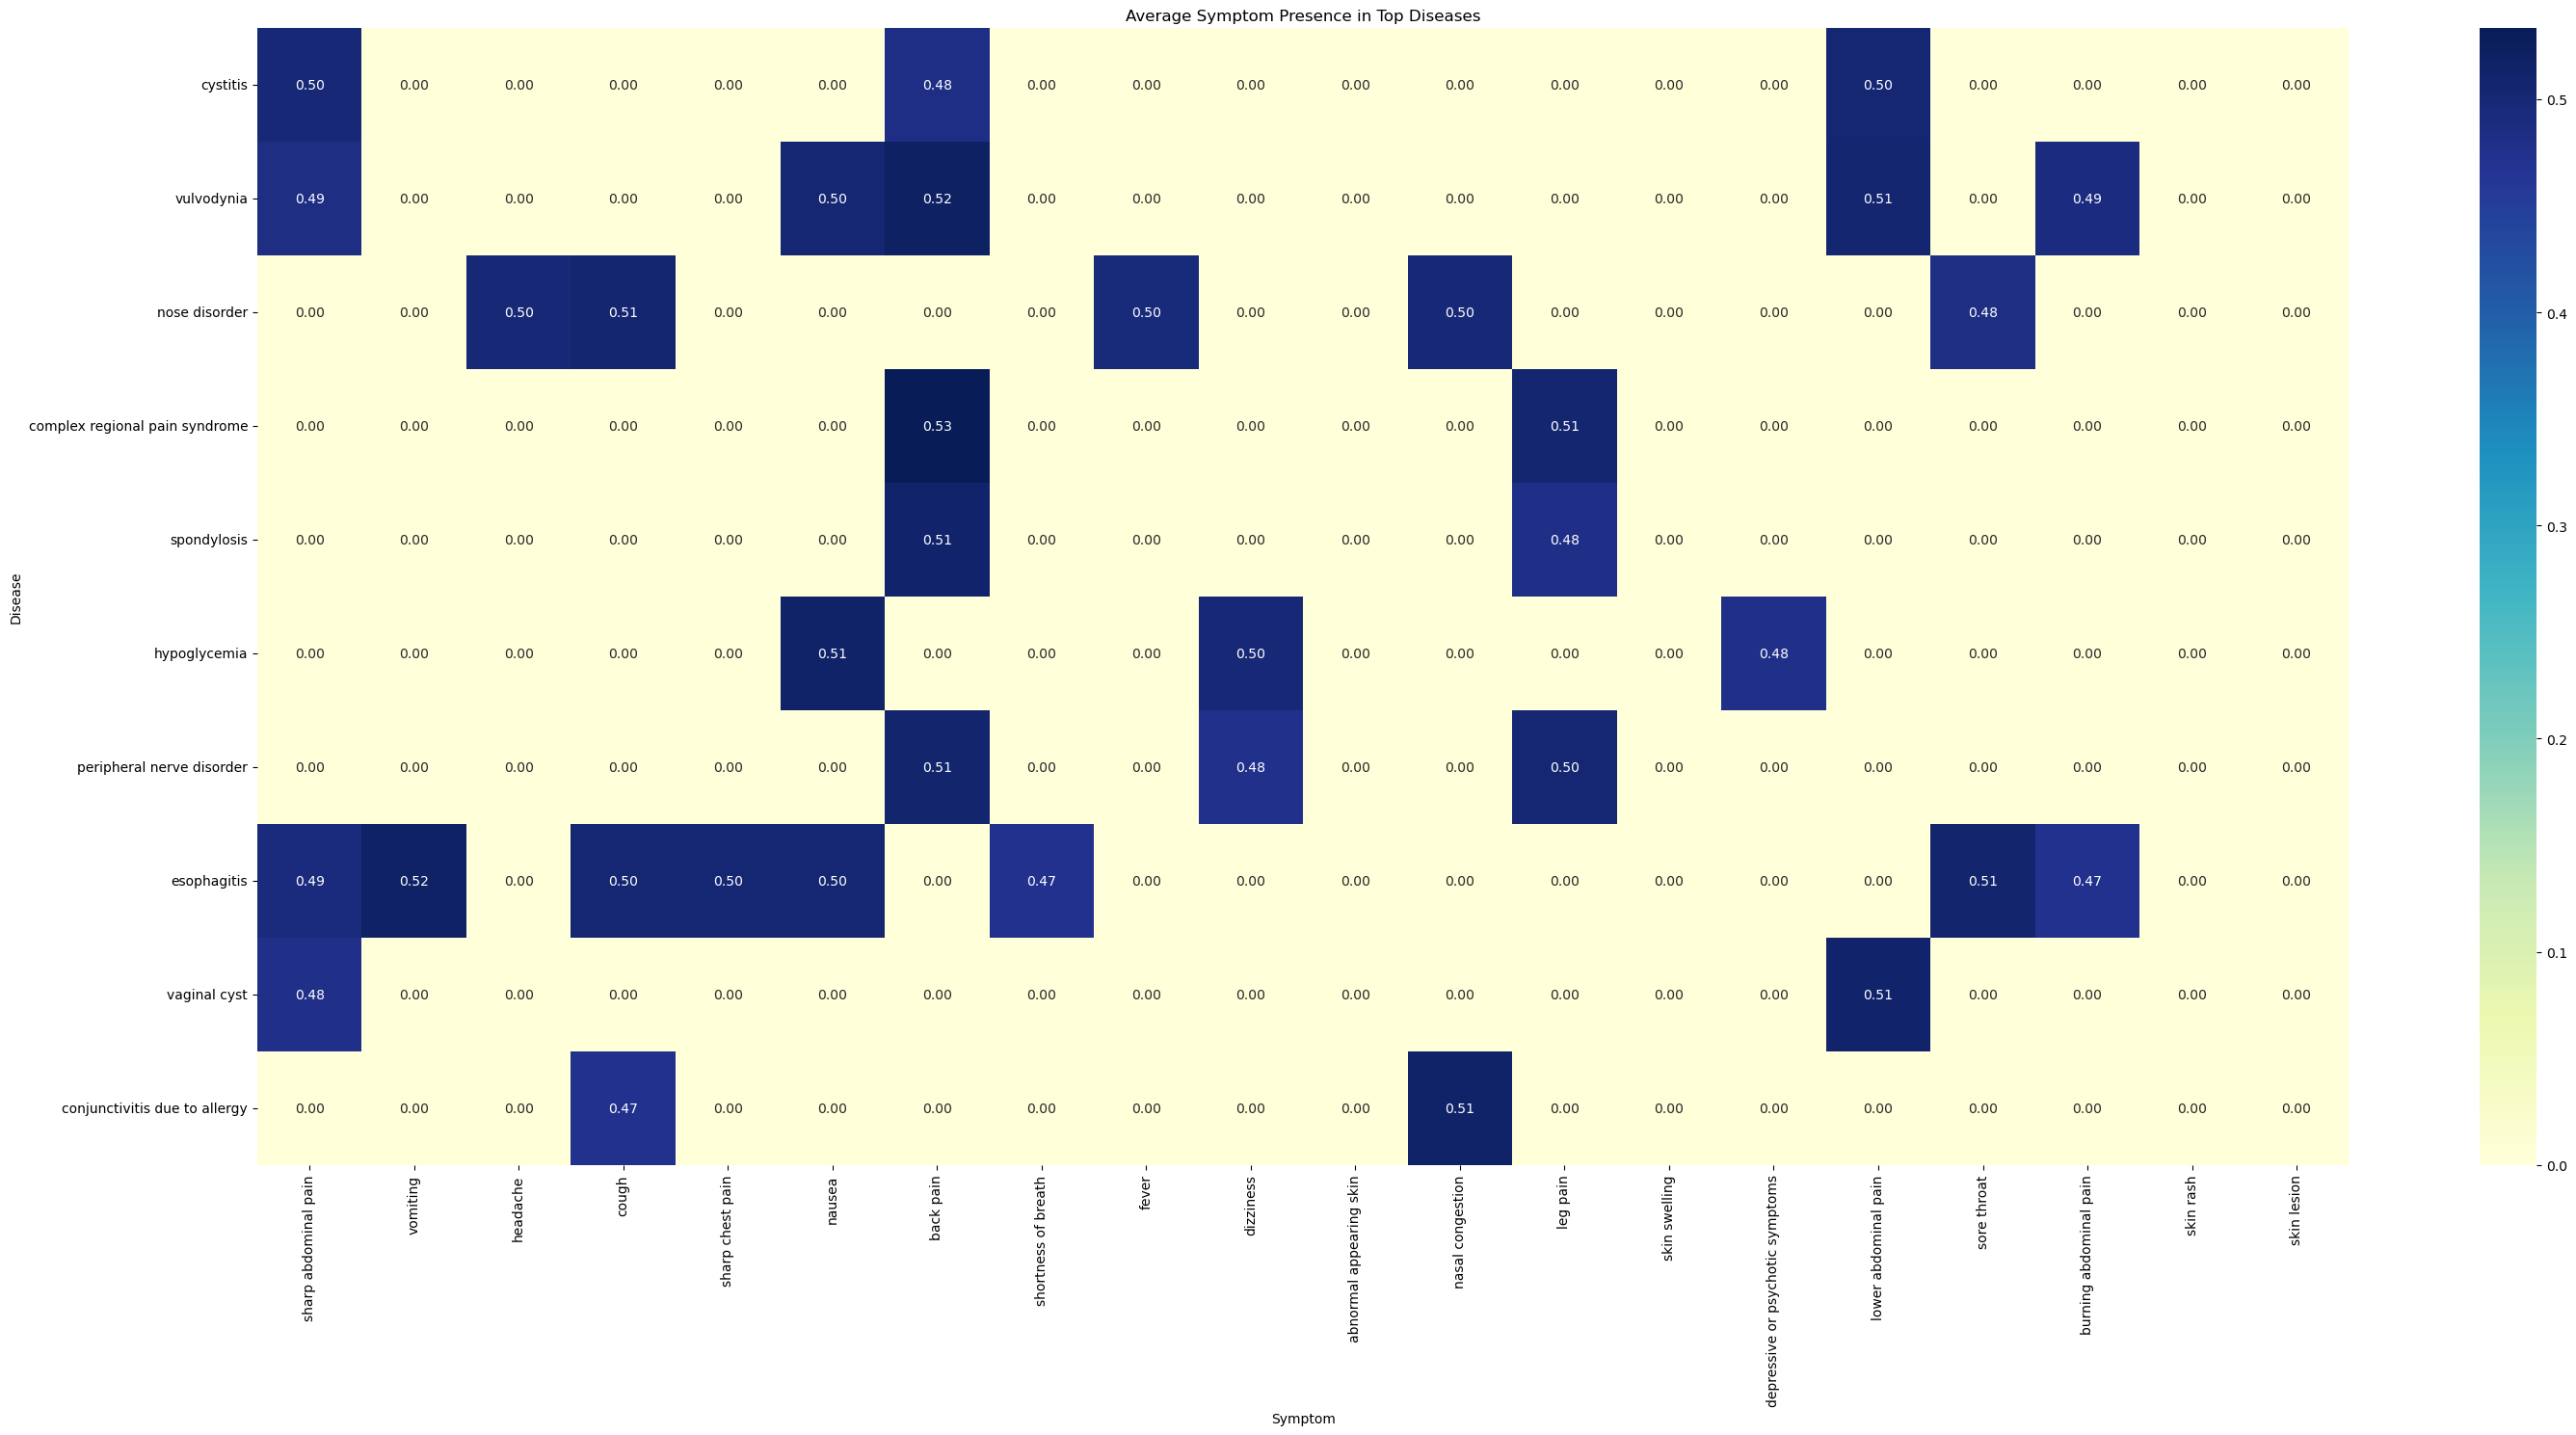

In [23]:
# Symptom-Disease Heatmap
heatmap_data = disease_symptom_df.groupby('diseases')[symptom_cols].mean()
top_diseases = disease_symptom_df['diseases'].value_counts().head(10).index
top_symptoms = symptom_totals.head(20).index
plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_data.loc[top_diseases, top_symptoms], cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Average Symptom Presence in Top Diseases")
plt.ylabel("Disease")
plt.xlabel("Symptom")
plt.tight_layout()
plt.show()